In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns


In [129]:
import matplotlib.pyplot as plt
%matplotlib inline

In [130]:
housing=pd.read_csv('housing.csv')

In [131]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [132]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.5+ MB


In [133]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [134]:
'''This is a categorical columns with  5 different categories.the method vaalue counts give the total number of value that 
belongs to that category as we can see below rom the results that out of all the categories 6551 rows belongs to inland 
category'''
housing['ocean_proximity'].value_counts()


<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

C:\Users\shoaibakhtar\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\shoaibakhtar\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\shoaibakhtar\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\shoaibakhtar\Anaconda3\lib\site-pac

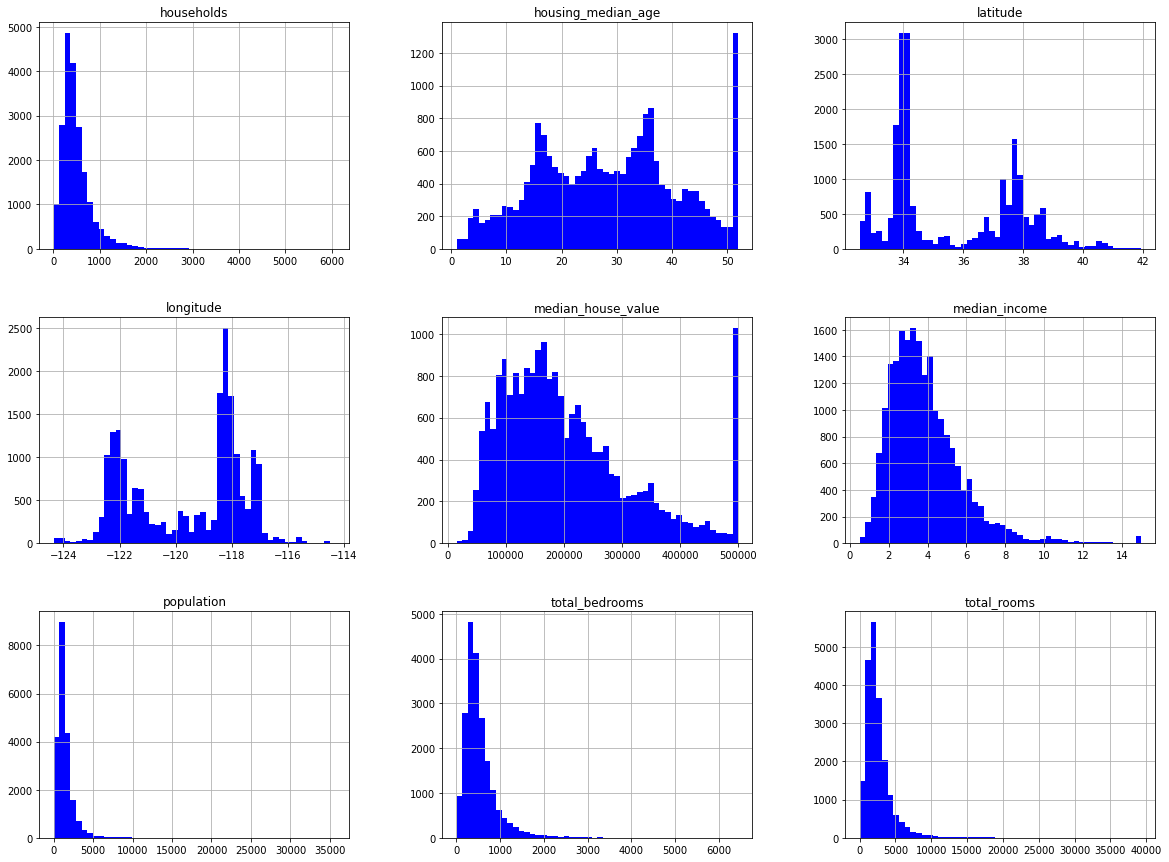

In [135]:
housing.hist(bins=50,figsize=(20,15),color='b')
plt.show()

. Finally, many histograms are tail heavy: they extend much farther to the right of
the median than to the left. This may make it a bit harder for some Machine
Learning algorithms to detect patterns. We will try transforming these attributes
later on to have more bell-shaped distributions.


# Create a test set

test set generation is an often neglected but critical part of a Machine Learning project.
If you look at the test set, you may stumble upon some seemingly interesting pattern in the test data that leads you to select a particular kind of Machine Learning model. When you estimate the generalization error using the test
set, your estimate will be too optimistic and you will launch a system that will not perform as well as expected. This is called data snooping bias.
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
The above methode is a random sampling method.This is generally fine if
your dataset is large enough (especially relative to the number of attributes), but if it
is not, you run the risk of introducing a significant sampling bias. When a survey
company decides to call 1,000 people to ask them a few questions, they don’t just pick
1,000 people randomly in a phone booth. They try to ensure that these 1,000 people
are representative of the whole population. For example, the US population is com‐
posed of 51.3% female and 48.7% male, so a well-conducted survey in the US would
try to maintain this ratio in the sample: 513 female and 487 male. This is called strati‐
fied sampling: the population is divided into homogeneous subgroups called strata,
and the right number of instances is sampled from each stratum to guarantee that the
test set is representative of the overall population. If they used purely random sam‐
pling, there would be about 12% chance of sampling a skewed test set with either less
than 49% female or more than 54% female. Either way, the survey results would be
significantly biased.
Suppose you chatted with experts who told you that the median income is a very
important attribute to predict median housing prices. You may want to ensure that
the test set is representative of the various categories of incomes in the whole dataset.
Since the median income is a continuous numerical attribute, you first need to create
an income category attribute. Let’s look at the median income histogram more closely Suppose you chatted with experts who told you that the median income is a very
important attribute to predict median housing prices. You may want to ensure that
the test set is representative of the various categories of incomes in the whole dataset.
Since the median income is a continuous numerical attribute, you first need to create
an income category attribute. Let’s look at the median income histogram more closely Most median income values are clustered around 2–5 (tens of thousands of dollars),
but some median incomes go far beyond 6. It is important to have a sufficient number of instances in your dataset for each stratum, or else the estimate of the stratum’s
importance may be biased. This means that you should not have too many strata, and
each stratum should be large enough. The following code creates an income category
attribute by dividing the median income by 1.5 (to limit the number of income cate‐
gories), and rounding up using ceil (to have discrete categories), and then merging
all the categories greater than 5 into category 5


In [136]:
housing['income_cat']=np.ceil(housing['median_income']/1.5)
housing['income_cat'].where(housing['income_cat']<5,other=5,inplace=True)

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.where.html?highlight=pandas%20dataframe%20where#pandas.DataFrame.where
    DataFrame.where(cond, other=nan, inplace=False, axis=None, level=None, errors='raise', try_cast=False)[source]
Replace values where the condition is False.

Parameters
condbool Series/DataFrame, array-like, or callable
Where cond is True, keep the original value. Where False, replace with corresponding value from other. If cond is callable, it is computed on the Series/DataFrame and should return boolean Series/DataFrame or array. The callable must not change input Series/DataFrame (though pandas doesn’t check it).

otherscalar, Series/DataFrame, or callable
Entries where cond is False are replaced with corresponding value from other. If other is callable, it is computed on the Series/DataFrame and should return scalar or Series/DataFrame. The callable must not change input Series/DataFrame (though pandas doesn’t check it).

In [137]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2.0


https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html
    Stratified ShuffleSplit cross-validator

Provides train/test indices to split data in train/test sets.

This cross-validation object is a merge of StratifiedKFold and ShuffleSplit, which returns stratified randomized folds. The folds are made by preserving the percentage of samples for each class.

Note: like the ShuffleSplit strategy, stratified random splits do not guarantee that all folds will be different, although this is still very likely for sizeable datasets.

In [138]:
#Now you are ready to do stratified sampling based on the income category. For this
#you can use Scikit-Learn’s StratifiedShuffleSplit class:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set =housing.iloc[train_index]
    strat_test_set = housing.iloc[test_index]


In [139]:
housing["income_cat"].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

In [140]:
housing["income_cat"].value_counts()/len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [141]:
strat_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN,5.0
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,240300.0,<1H OCEAN,4.0
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,218200.0,<1H OCEAN,3.0
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,182100.0,INLAND,3.0
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,121300.0,INLAND,3.0
...,...,...,...,...,...,...,...,...,...,...,...
20519,-121.53,38.58,33.0,4988.0,1169.0,2414.0,1075.0,1.9728,76400.0,INLAND,2.0
17430,-120.44,34.65,30.0,2265.0,512.0,1402.0,471.0,1.9750,134000.0,NEAR OCEAN,2.0
4019,-118.49,34.18,31.0,3073.0,674.0,1486.0,684.0,4.8984,311700.0,<1H OCEAN,4.0
12107,-117.32,33.99,27.0,5464.0,850.0,2400.0,836.0,4.7110,133500.0,INLAND,4.0


In [142]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,2.0
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,5.0
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,2.0
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,2.0
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,3.0
...,...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,INLAND,4.0
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,INLAND,2.0
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,INLAND,3.0
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,<1H OCEAN,3.0


In [143]:
#Now you should remove the income_cat attribute so the data is back to its original
#state:
for i in (strat_train_set, strat_test_set):
    i.drop(["income_cat"], axis=1, inplace=True)

C:\Users\shoaibakhtar\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [144]:
housing = strat_train_set.copy()
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,<1H OCEAN


In [145]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,<1H OCEAN


# Visualisation of Data to get Insights

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

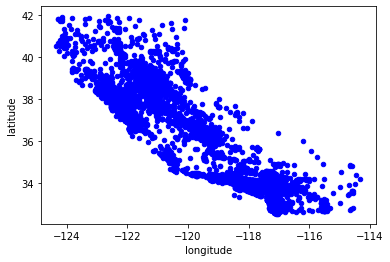

In [146]:
housing.plot(x='longitude',y='latitude',kind='scatter',color='b')

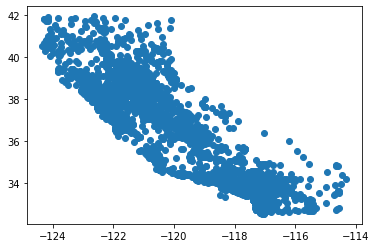

In [147]:

plt.scatter(x=housing['longitude'], y=housing['latitude'],  marker='o', cmap= 'gist_rainbow_r')

Setting the alpha option to 0.1 makes it much easier to visualize the places
where there is a high density of data points

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

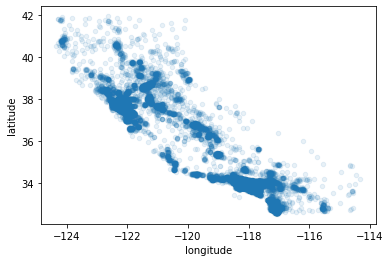

In [148]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1)

The radius of each circle represents
the district’s population (option s), and the color represents the price (option c). We
will use a predefined color map (option cmap) called jet, which ranges from blue
(low values) to red (high prices):15


C:\Users\shoaibakhtar\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\shoaibakhtar\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\shoaibakhtar\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\shoaibakhtar\Anaconda3\lib\site-pac

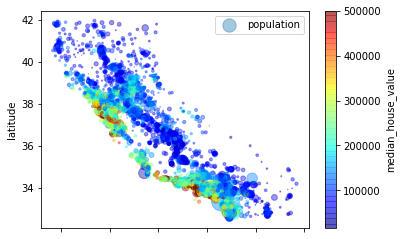

In [149]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=housing["population"]/100, label="population",
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

# Looking for Correlations

Since the dataset is not too large, you can easily compute the standard correlation
coecient (also called Pearson’s r) between every pair of attributes using the corr()
method
The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that
there is a strong positive correlation; for example, the median house value tends to go
up when the median income goes up. When the coefficient is close to –1, it means
that there is a strong negative correlation; you can see a small negative correlation
between the latitude and the median house value (i.e., prices have a slight tendency to
go down when you go north). Finally, coefficients close to zero mean that there is no
linear correlation. Figure 2-14 shows various plots along with the correlation coeffi‐
cient between their horizontal and vertical axes.
Positive correlation shows the positive linear movement of variables in the same direction. If one stock increases and another stock also increases with it, then that it is a positive correlation. A negative correlation is where both variables act in the opposite direction.


In [150]:
corr_matrix=housing.corr()

In [151]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


In [152]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

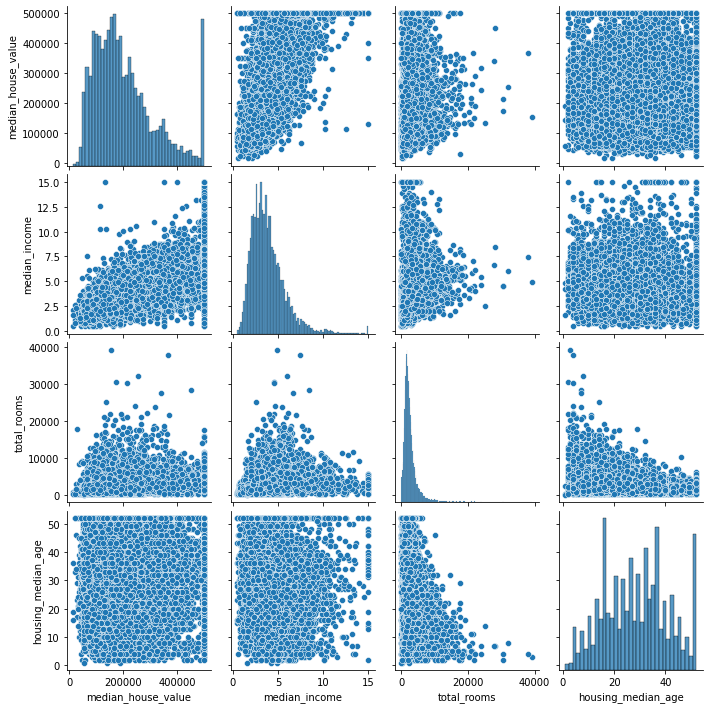

In [153]:
sns.pairplot(housing[['median_house_value','median_income','total_rooms','housing_median_age']])

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

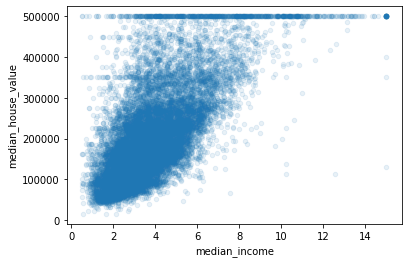

In [154]:
housing.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.1)

This plot reveals a few things. First, the correlation is indeed very strong; you can
clearly see the upward trend and the points are not too dispersed. Second, the price
cap that we noticed earlier is clearly visible as a horizontal line at 500,000. But this
plot reveals other less obvious straight lines: a horizontal line around 450,000,
another around 350,000, perhaps one around 280,000, and a few more below that.
You may want to try removing the corresponding districts to prevent your algorithms
from learning to reproduce these data quirks.

# Experimenting with attribute combination

 few data quirks that you may want to clean up
before feeding the data to a Machine Learning algorithm, and you found interesting
correlations between attributes, in particular with the target attribute. 
you may want to do before actually preparing the data for Machine
Learning algorithms is to try out various attribute combinations. For example, the
total number of rooms in a district is not very useful if you don’t know how many
households there are. What you really want is the number of rooms per household.
Similarly, the total number of bedrooms by itself is not very useful: you probably
want to compare it to the number of rooms. And the population per household also
seems like an interesting attribute combination to look at. Let’s create these new
attributes:

In [155]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]


In [156]:
corr_matrix=housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

# prepare Data for ML algorithm

Instead of just
doing this manually, you should write functions to do that, for several good reasons:
• This will allow you to reproduce these transformations easily on any dataset (e.g.,
the next time you get a fresh dataset).
• You will gradually build a library of transformation functions that you can reuse
in future projects.
• You can use these functions in your live system to transform the new data before
feeding it to your algorithms.
Prepare the Data for Machine Learning Algorithms | 59
• This will make it possible for you to easily try various transformations and see
which combination of transformations works best.
But first let’s revert to a clean training set (by copying strat_train_set once again),
and let’s separate the predictors and the labels since we don’t necessarily want to apply
the same transformations to the predictors and the target values (note that drop()
creates a copy of the data and does not affect strat_train_set):

In [157]:
housng_labels=strat_train_set['median_house_value'].copy()
housing=strat_train_set.drop("median_house_value",axis=1)
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,<1H OCEAN


# Data Cleaning

Most Machine Learning algorithms cannot work with missing features, so let’s create
a few functions to take care of them. You noticed earlier that the total_bedrooms
attribute has some missing values, so let’s fix this.
• Get rid of the corresponding districts.
• Get rid of the whole attribute.
• Set the values to some value (zero, the mean, the median, etc.)
housing.dropna(subset=["total_bedrooms"]) # option 1
housing.drop("total_bedrooms", axis=1) # option 2
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median) # option 3
If you choose option 3, you should compute the median value on the training set, and
use it to fill the missing values in the training set, but also don’t forget to save the
median value that you have computed. You will need it later to replace missing values
in the test set when you want to evaluate your system, and also once the system goes
live to replace missing values in new data.
Scikit-Learn provides a handy class to take care of missing values: Imputer. Here is
how to use it. First, you need to create an Imputer instance, specifying that you want
to replace each attribute’s missing values with the median of that attribute:

In [160]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')

In [161]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')

In [162]:
'''Since the median can only be computed on numerical attributes, we need to create a
copy of the data without the text attribute ocean_proximity:'''
housing_num=housing.drop('ocean_proximity',axis=1)

In [163]:
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

The imputer has simply computed the median of each attribute and stored the result
in its statistics_ instance variable. Only the total_bedrooms attribute had missing
values, but we cannot be sure that there won’t be any missing values in new data after
the system goes live, so it is safer to apply the imputer to all the numerical attributes:

In [164]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [165]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [166]:
X=imputer.transform(housing_num)

In [167]:
X

array([[-121.89  ,   37.29  ,   38.    , ...,  710.    ,  339.    ,
           2.7042],
       [-121.93  ,   37.05  ,   14.    , ...,  306.    ,  113.    ,
           6.4214],
       [-117.2   ,   32.77  ,   31.    , ...,  936.    ,  462.    ,
           2.8621],
       ...,
       [-116.4   ,   34.09  ,    9.    , ..., 2098.    ,  765.    ,
           3.2723],
       [-118.01  ,   33.82  ,   31.    , ..., 1356.    ,  356.    ,
           4.0625],
       [-122.45  ,   37.77  ,   52.    , ..., 1269.    ,  639.    ,
           3.575 ]])

In [168]:
housing_tr=pd.DataFrame(X,columns=housing_num.columns)

In [169]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
16507,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
16508,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
16509,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
16510,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


# Handling Categorical Attributes

we left out the categorical attribute ocean_proximity because it is a text
attribute so we cannot compute its median. Most Machine Learning algorithms pre‐
fer to work with numbers anyway, so let’s convert these text labels to numbers.
Scikit-Learn provides a transformer for this task called LabelEncoder:

Here is a link to check for different methods to work with categorical attributes
https://pbpython.com/categorical-encoding.html

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
housing_cat=housing['ocean_proximity']
housing_cat_encoded=le.fit_transform(housing_cat)
housing_cat_encoded
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(categories='auto')
housing_cat_1hot_encoded=ohe.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot_encoded.toarray()


Scikit-Learn provides a OneHotEncoder encoder to convert integer categorical values
into one-hot vectors. Let’s encode the categories as one-hot vectors. Note that
fit_transform() expects a 2D array, but housing_cat_encoded is a 1D array, so we
need to reshape it


We can apply both transformations (from text categories to integer categories, then
from integer categories to one-hot vectors) in one shot using the LabelBinarizer
class:
Note that this returns a dense NumPy array by default. You can get a sparse matrix
instead by passing sparse_output=True to the LabelBinarizer constructor.

In [170]:
from sklearn.base import TransformerMixin #gives fit_transform method for free
from sklearn.preprocessing import LabelBinarizer
class MyLabelBinarizer(TransformerMixin):
    def __init__(self, *args, **kwargs):
        self.encoder = LabelBinarizer(*args, **kwargs)
    def fit(self, x, y=0):
        self.encoder.fit(x)
        return self
    def transform(self, x, y=0):
        return self.encoder.transform(x)


I think you are going through the examples from the book: Hands on Machine Learning with Scikit Learn and Tensorflow. I ran into the same problem when going through the example in Chapter 2.

As mentioned by other people, the problem is to do with sklearn's LabelBinarizer. It takes less args in its fit_transform method compared to other transformers in the pipeline. (only y when other transformers normally take both X and y, see here for details). That's why when we run pipeline.fit_transform, we fed more args into this transformer than required.

An easy fix I used is to just use OneHotEncoder and set the "sparse" to False to ensure the output is a numpy array same as the num_pipeline output. (this way you don't need to code up your own custom encoder)
  or we  fix this easy by using OneHotEncoder and set the "sparse" to False to ensure the output is a numpy array same as the num_pipeline output. (this way you don't need to code up your own custom encoder)
  cat_pipeline = Pipeline([
('selector', DataFrameSelector(cat_attribs)),
('one_hot_encoder', OneHotEncoder(sparse=False))
])

Notice that the output is a SciPy sparse matrix, instead of a NumPy array. This is very
useful when you have categorical attributes with thousands of categories. After onehot encoding we get a matrix with thousands of columns, and the matrix is full of
zeros except for one 1 per row. Using up tons of memory mostly to store zeros would
be very wasteful, so instead a sparse matrix only stores the location of the nonzero
elements. You can use it mostly like a normal 2D array,19 but if you really want to con‐
vert it to a (dense) NumPy array, just call the toarray() method:

We can apply both transformations (from text categories to integer categories, then
from integer categories to one-hot vectors) in one shot using the LabelBinarizer
class:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()

housing_cat_1hot = encoder.fit_transform(housing_cat)

housing_cat_1hot

# Custom Transformers

Although Scikit-Learn provides many useful transformers, you will need to write
your own for tasks such as custom cleanup operations or combining specific
attributes. You will want your transformer to work seamlessly with Scikit-Learn func‐
tionalities (such as pipelines), and since Scikit-Learn relies on duck typing (not inher‐
itance), all you need is to create a class and implement three methods: fit()
(returning self), transform(), and fit_transform(). You can get the last one for
free by simply adding TransformerMixin as a base class. Also, if you add BaseEstima
tor as a base class (and avoid *args and **kargs in your constructor) you will get
two extra methods (get_params() and set_params()) that will be useful for auto‐
matic hyperparameter tuning. For example, here is a small transformer class that adds
the combined attributes 

In [171]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
         return self # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

# Feature scaling

One of the most important transformations you need to apply to your data is feature
scaling. With few exceptions, Machine Learning algorithms don’t perform well when
the input numerical attributes have very different scales. This is the case for the hous‐
ing data: the total number of rooms ranges from about 6 to 39,320, while the median
incomes only range from 0 to 15. Note that scaling the target values is generally not
required.
There are two common ways to get all attributes to have the same scale: min-max
scaling and standardization.


Min-max scaling (many people call this normalization) is quite simple: values are
shifted and rescaled so that they end up ranging from 0 to 1. We do this by subtract‐
ing the min value and dividing by the max minus the min. Scikit-Learn provides a
transformer called MinMaxScaler for this. It has a feature_range hyperparameter
that lets you change the range if you don’t want 0–1 for some reason.


Standardization is quite different: first it subtracts the mean value (so standardized
values always have a zero mean), and then it divides by the variance so that the result‐
ing distribution has unit variance. Unlike min-max scaling, standardization does not
bound values to a specific range, which may be a problem for some algorithms (e.g.,
neural networks often expect an input value ranging from 0 to 1). However, standard‐
ization is much less affected by outliers. For example, suppose a district had a median
income equal to 100 (by mistake). Min-max scaling would then crush all the other
values from 0–15 down to 0–0.15, whereas standardization would not be much affec‐
ted. Scikit-Learn provides a transformer called StandardScaler for standardization.
Prepare the Data for Machine Learning Algorithms | 65
As with all the transformations, it is important to fit the scalers to
the training data only, not to the full dataset (including the test set).
Only then can you use them to transform the training set and the
test set (and new data).

# Transformation Pipeline

There are many data transformation steps that need to be executed in
the right order. Fortunately, Scikit-Learn provides the Pipeline class to help with
such sequences of transformations. Here is a small pipeline for the numerical
attributes:

In [172]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline=Pipeline([('imputer',SimpleImputer(strategy='median')),
                       ('attr_addr',CombinedAttributesAdder()),
                      ('std_scaler',StandardScaler())])
housing_num_tr=num_pipeline.fit_transform(housing_num)

The Pipeline constructor takes a list of name/estimator pairs defining a sequence of
steps. All but the last estimator must be transformers (i.e., they must have a
fit_transform() method). The names can be anything you like.
When you call the pipeline’s fit() method, it calls fit_transform() sequentially on
all transformers, passing the output of each call as the parameter to the next call, until
it reaches the final estimator, for which it just calls the fit() method.
The pipeline exposes the same methods as the final estimator. In this example, the last
estimator is a StandardScaler, which is a transformer, so the pipeline has a trans
form() method that applies all the transforms to the data in sequence (it also has a
fit_transform method that we could have used instead of calling fit() and then
transform()).
You now have a pipeline for numerical values, and you also need to apply the LabelBi
narizer on the categorical values: how can you join these transformations into a sin‐
gle pipeline? Scikit-Learn provides a FeatureUnion class for this. You give it a list of
transformers (which can be entire transformer pipelines), and when its transform()
method is called it runs each transformer’s transform() method in parallel, waits for
their output, and then concatenates them and returns the result (and of course calling
its fit() method calls all each transformer’s fit() method). A full pipeline handling
both numerical and categorical attributes may look like this:


Each subpipeline starts with a selector transformer: it simply transforms the data by
selecting the desired attributes (numerical or categorical), dropping the rest, and con‐
verting the resulting DataFrame to a NumPy array. There is nothing in Scikit-Learn
to handle Pandas DataFrames,20 so we need to write a simple custom transformer for
this task:

In [173]:
from sklearn.base import BaseEstimator,TransformerMixin
class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self,attr_names):
        self.attr_names=attr_names
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        return X[self.attr_names].values

In [174]:
from sklearn.pipeline import FeatureUnion
num_attr=list(housing_num)
cat_attr=['ocean_proximity']
num_pipeline=Pipeline([('selector',DataFrameSelector(num_attr)),
                      ('imputer',SimpleImputer(strategy='median')),
                      ('attr_adder',CombinedAttributesAdder()),
                      ('std_scaler',StandardScaler())])
cat_pipeline=Pipeline([('selector',DataFrameSelector(cat_attr)),
                      ('label_encoder',MyLabelBinarizer())])
full_pipeline=FeatureUnion(transformer_list=[('num_pipeline',num_pipeline),
                                            ('cat_pipeline',cat_pipeline)])

https://stackoverflow.com/questions/46162855/fit-transform-takes-2-positional-arguments-but-3-were-given-with-labelbinarize

In [175]:
list(housing_num)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [176]:
housing_prepared = full_pipeline.fit_transform(housing)

In [177]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,<1H OCEAN


In [178]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

# select and train model


# Training and Evaluating on the Training Set

In [179]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(housing_prepared,housng_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [180]:
some_data=housing.iloc[:5]
some_labels=housng_labels[:5]
some_data_prepared=full_pipeline.transform(some_data)

In [181]:
print('predictions:\t',lr.predict(some_data_prepared))

predictions:	 [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [182]:
print('labels:\t',list(some_labels))

labels:	 [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [183]:
housing_predictions=lr.predict(housing_prepared)
from sklearn.metrics import mean_squared_error
print('MSE:\t',mean_squared_error(housing_predictions,housng_labels))
print('RMSE:\t',np.sqrt(mean_squared_error(housing_predictions,housng_labels)))


MSE:	 4709829587.97112
RMSE:	 68628.19819848922


Okay, this is better than nothing but clearly not a great score: most districts’
median_housing_values range between 120,000 and 265,000, so a typical predic‐
tion error of 68,628 is not very satisfying. This is an example of a model underfitting
the training data. When this happens it can mean that the features do not provide
enough information to make good predictions, or that the model is not powerful
enough. As we saw in the previous chapter, the main ways to fix underfitting are to

select a more powerful model, to feed the training algorithm with better features, or
to reduce the constraints on the model. This model is not regularized, so this rules
out the last option. You could try to add more features (e.g., the log of the popula‐
tion), but first let’s try a more complex model to see how it does.
Let’s train a DecisionTreeRegressor. This is a powerful model, capable of finding
complex nonlinear relationships in the data

# DecesionTreeRegressor model

This is a powerful model, capable of finding
complex nonlinear relationships in the data


In [184]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(housing_prepared,housng_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [185]:
Dtr_predictions=dtr.predict(housing_prepared)

In [186]:

print('Tree MSE:\t',mean_squared_error(housng_labels,Dtr_predictions))

Tree MSE:	 0.0


In [187]:

print('Tree RMSE:\t',np.sqrt(mean_squared_error(housng_labels,Dtr_predictions)))

Tree RMSE:	 0.0


 No error at all? Could this model really be absolutely perfect? Of course,
it is much more likely that the model has badly overfit the data. How can you be sure?
As we saw earlier, you don’t want to touch the test set until you are ready to launch a
model you are confident about, so you need to use part of the training set for train‐
ing, and part for model validation.

# Better Evaluation using Cross Validation

One way to evaluate the Decision Tree model would be to use the train_test_split
function to split the training set into a smaller training set and a validation set, then
train your models against the smaller training set and evaluate them against the vali‐
dation set. It’s a bit of work, but nothing too difficult and it would work fairly well.

A great alternative is to use Scikit-Learn’s cross-validation feature. The following code
performs K-fold cross-validation: it randomly splits the training set into 10 distinct
subsets called folds, then it trains and evaluates the Decision Tree model 10 times,
picking a different fold for evaluation every time and training on the other 9 folds.
The result is an array containing the 10 evaluation scores:

In [196]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(dtr,housing_prepared,housng_labels,
                       scoring="neg_mean_squared_error",cv=10)

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
sklearn.model_selection.cross_val_score(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)

Scikit-Learn cross-validation features expect a utility function
(greater is better) rather than a cost function (lower is better), so
the scoring function is actually the opposite of the MSE (i.e., a neg‐
ative value), which is why the preceding code computes -scores
before calculating the square root.

In [203]:
tree_rmse_score=np.sqrt(-scores)
tree_rmse_score

array([68198.77111529, 66754.72406439, 71557.70977685, 70076.70858024,
       71420.11580286, 76088.31156808, 72077.90341058, 70371.18915978,
       77400.82639347, 69628.71902764])

In [204]:
print('scores:\t',tree_rmse_score)
print('Mean:\t',tree_rmse_score.mean())
print('standard deviation:',tree_rmse_score.std())

scores:	 [68198.77111529 66754.72406439 71557.70977685 70076.70858024
 71420.11580286 76088.31156808 72077.90341058 70371.18915978
 77400.82639347 69628.71902764]
Mean:	 71357.49788991737
standard deviation: 3102.102377801253


Now the Decision Tree doesn’t look as good as it did earlier. In fact, it seems to per‐
form worse than the Linear Regression model! Notice that cross-validation allows
you to get not only an estimate of the performance of your model, but also a measure
of how precise this estimate is (i.e., its standard deviation). The Decision Tree has a
score of approximately 71,200, generally ±3,200. You would not have this information
if you just used one validation set. But cross-validation comes at the cost of training
the model several times, so it is not always possible.

Let’s compute the same scores for the Linear Regression model just to be sure:


In [209]:
lin_scores=cross_val_score(lr,housing_prepared,housng_labels,
                           scoring="neg_mean_squared_error",cv=10)

In [210]:
lin_rmse_score=np.sqrt(-lin_scores)
lin_rmse_score

array([66782.73843989, 66960.118071  , 70347.95244419, 74739.57052552,
       68031.13388938, 71193.84183426, 64969.63056405, 68281.61137997,
       71552.91566558, 67665.10082067])

In [211]:
print('scores:\t',lin_rmse_score)
print('Mean:\t',lin_rmse_score.mean())
print('standard deviation:',lin_rmse_score.std())

scores:	 [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean:	 69052.46136345083
standard deviation: 2731.6740017983457


That’s right: the Decision Tree model is overfitting so badly that it performs worse
than the Linear Regression model.


# Random Forest Regressor

Random Forests work by training many Decision Trees on random subsets of
the features, then averaging out their predictions. Building a model on top of many
other models is called Ensemble Learning, and it is often a great way to push ML algo‐
rithms even further. We will skip most of the code since it is essentially the same as
for the other models:

In [213]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(housing_prepared,housng_labels)

C:\Users\shoaibakhtar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [214]:
rf_scores=cross_val_score(rf,housing_prepared,housng_labels,
                         scoring='neg_mean_squared_error',cv=10)

In [215]:
rf_rmse_score=np.sqrt(-rf_scores)

In [216]:
print('scores:\t',rf_rmse_score)
print('Mean:\t',rf_rmse_score.mean())
print('standard deviation:',rf_rmse_score.std())

scores:	 [52577.96941743 50493.19718309 51749.39532174 54611.75742451
 52830.52211088 54762.97746973 51121.86262551 49680.81566319
 54857.37572981 53130.76302937]
Mean:	 52581.66359752622
standard deviation: 1732.6866802831214


this is much better: Random Forests look very promising. However, note that
the score on the training set is still much lower than on the validation sets, meaning
that the model is still overfitting the training set. Possible solutions for overfitting are
to simplify the model, constrain it (i.e., regularize it), or get a lot more training data.
However, before you dive much deeper in Random Forests, you should try out many
other models from various categories of Machine Learning algorithms (several Sup‐
port Vector Machines with different kernels, possibly a neural network, etc.), without
spending too much time tweaking the hyperparameters. The goal is to shortlist a few
(two to five) promising models.

You should save every model you experiment with, so you can
come back easily to any model you want. Make sure you save both
the hyperparameters and the trained parameters, as well as the
cross-validation scores and perhaps the actual predictions as well.
This will allow you to easily compare scores across model types,
and compare the types of errors they make. You can easily save
Scikit-Learn models by using Python’s pickle module, or using
sklearn.externals.joblib, which is more efficient at serializing
large NumPy arrays:

# Fine Tuning Model

One way to do that would be to fiddle with the hyperparameters manually, until you
find a great combination of hyperparameter values. This would be very tedious work,
and you may not have time to explore many combinations.


Instead you should get Scikit-Learn’s GridSearchCV to search for you. All you need to
do is tell it which hyperparameters you want it to experiment with, and what values to
try out, and it will evaluate all the possible combinations of hyperparameter values,
using cross-validation. For example, the following code searches for the best combi‐
nation of hyperparameter values for the RandomForestRegressor:

just try a bunch of combinations and see what works best! This idea of creating a 'grid' of parameters and just trying out all the possible combinations is called a Gridsearch, this method is common enough that Scikit-learn has this functionality built in with GridSearchCV! The CV stands for cross-validation which is the GridSearchCV takes a dictionary that describes the parameters that should be tried and a model to train. The grid of parameters is defined as a dictionary, where the keys are the parameters and the values are the settings to be tested

In [219]:
from sklearn.model_selection import GridSearchCV
param_grid=[{'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
            {'bootstrap':[False],'n_estimators':[3,10],
             'max_features':[2,3,4]}]

In [221]:
fr=RandomForestRegressor()
grid_search=GridSearchCV(fr,param_grid,cv=5,refit=True,verbose=3,
                         scoring='neg_mean_squared_error')


In [222]:
grid_search.fit(housing_prepared,housng_labels)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] max_features=2, n_estimators=3 ..................................
[CV]  max_features=2, n_estimators=3, score=-4006376283.383, total=   0.2s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



[CV] max_features=2, n_estimators=3 ..................................
[CV]  max_features=2, n_estimators=3, score=-4715126163.152, total=   0.2s
[CV] max_features=2, n_estimators=3 ..................................
[CV]  max_features=2, n_estimators=3, score=-4390680630.480, total=   0.2s
[CV] max_features=2, n_estimators=3 ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV]  max_features=2, n_estimators=3, score=-4109614383.992, total=   0.2s
[CV] max_features=2, n_estimators=3 ..................................
[CV]  max_features=2, n_estimators=3, score=-4119120040.096, total=   0.2s
[CV] max_features=2, n_estimators=10 .................................
[CV]  max_features=2, n_estimators=10, score=-2905638201.398, total=   0.5s
[CV] max_features=2, n_estimators=10 .................................
[CV]  max_features=2, n_estimators=10, score=-3042033256.069, total=   0.6s
[CV] max_features=2, n_estimators=10 .................................
[CV]  max_features=2, n_estimators=10, score=-3187932628.192, total=   0.7s
[CV] max_features=2, n_estimators=10 .................................
[CV]  max_features=2, n_estimators=10, score=-2831575753.634, total=   0.6s
[CV] max_features=2, n_estimators=10 .................................
[CV]  max_features=2, n_estimators=10, score=-3344009155.620, total=   0.6s
[CV] max_features=2, n_estimators=30 .......

[CV]  max_features=8, n_estimators=30, score=-2638250756.093, total=   4.2s
[CV] bootstrap=False, max_features=2, n_estimators=3 .................
[CV]  bootstrap=False, max_features=2, n_estimators=3, score=-3677910541.983, total=   0.3s
[CV] bootstrap=False, max_features=2, n_estimators=3 .................
[CV]  bootstrap=False, max_features=2, n_estimators=3, score=-4121175100.417, total=   0.3s
[CV] bootstrap=False, max_features=2, n_estimators=3 .................
[CV]  bootstrap=False, max_features=2, n_estimators=3, score=-3993794412.240, total=   0.2s
[CV] bootstrap=False, max_features=2, n_estimators=3 .................
[CV]  bootstrap=False, max_features=2, n_estimators=3, score=-3564087534.912, total=   0.3s
[CV] bootstrap=False, max_features=2, n_estimators=3 .................
[CV]  bootstrap=False, max_features=2, n_estimators=3, score=-3753445980.171, total=   0.3s
[CV] bootstrap=False, max_features=2, n_estimators=10 ................
[CV]  bootstrap=False, max_features=2,

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  1.7min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],


When you have no idea what value a hyperparameter should have,
a simple approach is to try out consecutive powers of 10 (or a
smaller number if you want a more fine-grained search, as shown
in this example with the n_estimators hyperparameter).

This param_grid tells Scikit-Learn to first evaluate all 3 × 4 = 12 combinations of
n_estimators and max_features hyperparameter values specified in the first dict then try all 2 × 3 = 6 combinations of hyperparameter values in the
second dict, but this time with the bootstrap hyperparameter set to False instead of
True (which is the default value for this hyperparameter).
All in all, the grid search will explore 12 + 6 = 18 combinations of RandomForestRe
gressor hyperparameter values, and it will train each model five times (since we are
using five-fold cross validation). In other words, all in all, there will be 18 × 5 = 90
rounds of training! It may take quite a long time, but when it is done you can get the
best combination of parameters like this:

In [223]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [224]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

If GridSearchCV is initialized with refit=True (which is the
default), then once it finds the best estimator using crossvalidation, it retrains it on the whole training set. This is usually a
good idea since feeding it more data will likely improve its perfor‐
mance.

 cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):

    print(np.sqrt(-mean_score), params)
    
 In this example, we obtain the best solution by setting the max_features hyperpara‐
meter to 6, and the n_estimators hyperparameter to 30. The RMSE score for this
combination is 49,959, which is slightly better than the score you got earlier using the default hyperparameter values (which was 52,634). 

 you can treat some of the data preparation steps as
hyperparameters. For example, the grid search will automatically
find out whether or not to add a feature you were not sure about
(e.g., using the add_bedrooms_per_room hyperparameter of your
CombinedAttributesAdder transformer). It may similarly be used
to automatically find the best way to handle outliers, missing fea‐
tures, feature selection, and more.


# Randomized search

The grid search approach is fine when you are exploring relatively few combinations,
like in the previous example, but when the hyperparameter search space is large, it is
often preferable to use RandomizedSearchCV instead. This class can be used in much
the same way as the GridSearchCV class, but instead of trying out all possible combi‐
nations, it evaluates a given number of random combinations by selecting a random
value for each hyperparameter at every iteration. This approach has two main bene‐
fits:
    
• If you let the randomized search run for, say, 1,000 iterations, this approach will
explore 1,000 different values for each hyperparameter (instead of just a few val‐
ues per hyperparameter with the grid search approach).

• You have more control over the computing budget you want to allocate to hyper‐
parameter search, simply by setting the number of iterations.


# Ensemble method

Another way to fine-tune your system is to try to combine the models that perform
best. The group (or “ensemble”) will often perform better than the best individual
model (just like Random Forests perform better than the individual Decision Trees
they rely on), especially if the individual models make very different types of errors

# Analyze the Best Models and Their Errors

In [226]:
feature_importance=grid_search.best_estimator_.feature_importances_
feature_importance

array([7.60346924e-02, 6.20532653e-02, 4.18262053e-02, 1.64512224e-02,
       1.67859136e-02, 1.66371959e-02, 1.57307020e-02, 3.27087861e-01,
       7.28062345e-02, 1.09130552e-01, 6.18742690e-02, 1.14662408e-02,
       1.61915525e-01, 7.55431344e-05, 4.08771182e-03, 6.03686638e-03])

RandomForestRegressor can indicate the relative importance of each
attribute for making accurate predictions:

In [255]:
extra_attr=['room_per_hh','pop_per_hh','bedroom_per_hh']
k=list(housing['ocean_proximity'].unique())
k.sort()
attr=num_attr+extra_attr+k
sorted(zip(feature_importance,attr),reverse=True)

[(0.327087860680339, 'median_income'),
 (0.1619155253917776, 'INLAND'),
 (0.10913055150716398, 'pop_per_hh'),
 (0.07603469236028042, 'longitude'),
 (0.07280623449795025, 'room_per_hh'),
 (0.06205326529573726, 'latitude'),
 (0.06187426897446665, 'bedroom_per_hh'),
 (0.041826205281713456, 'housing_median_age'),
 (0.016785913596464298, 'total_bedrooms'),
 (0.016637195913734804, 'population'),
 (0.016451222358548144, 'total_rooms'),
 (0.01573070202029561, 'households'),
 (0.011466240790496534, '<1H OCEAN'),
 (0.006036866381066745, 'NEAR OCEAN'),
 (0.004087711815563981, 'NEAR BAY'),
 (7.554313440126577e-05, 'ISLAND')]

With this information, you may want to try dropping some of the less useful features
(e.g., apparently only one ocean_proximity category is really useful, so you could try
dropping the others).
You should also look at the specific errors that your system makes, then try to under‐
stand why it makes them and what could fix the problem (adding extra features or, on
the contrary, getting rid of uninformative ones, cleaning up outliers, etc.).

# Evaluate system on Test set

After tweaking your models for a while, you eventually have a system that performs
sufficiently well. Now is the time to evaluate the final model on the test set. There is
nothing special about this process; just get the predictors and the labels from your
test set, run your full_pipeline to transform the data (call transform(), not
fit_transform()!), and evaluate the final model on the test set:

In [256]:
final_model=grid_search.best_estimator_

In [257]:
X_test=strat_test_set.drop('median_house_value',axis=1)
y_test=strat_test_set['median_house_value'].copy()

In [258]:
X_test_prepared=full_pipeline.transform(X_test)

In [259]:
final_pred=final_model.predict(X_test_prepared)

In [261]:
final_mse=mean_squared_error(y_test,final_pred)
final_mse

2319009854.4161587

In [262]:
final_rmse=np.sqrt(final_mse)
final_rmse

48156.09882887274

The performance will usually be slightly worse than what you measured using crossvalidation if you did a lot of hyperparameter tuning (because your system ends up
fine-tuned to perform well on the validation data, and will likely not perform as well
on unknown datasets). It is not the case in this example, but when this happens you
must resist the temptation to tweak the hyperparameters to make the numbers look
good on the test set; the improvements would be unlikely to generalize to new data.

Now comes the project prelaunch phase: you need to present your solution (high‐
lighting what you have learned, what worked and what did not, what assumptions
were made, and what your system’s limitations are), document everything, and create
nice presentations with clear visualizations and easy-to-remember statements (e.g.,
“the median income is the number one predictor of housing prices”).

 much of the work is in the data preparation step, building monitoring
tools, setting up human evaluation pipelines, and automating regular model training.
The Machine Learning algorithms are also important, of course, but it is probably
preferable to be comfortable with the overall process and know three or four algo‐
rithms well rather than to spend all your time exploring advanced algorithms and not
enough time on the overall process.
